# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [1]:
!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

  Using cached numpy-1.13.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached pandas-0.21.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached scipy-1.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached matplotlib-2.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached Pillow-4.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached scikit_image-0.13.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached python_dateutil-2.6.1-py2.py3-none-any.whl
  Using cached pytz-2017.3-py2.py3-none-any.whl
  Using cached scikit_learn-0.19.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached six-1.11.0-py2.py3-none-any.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached PyWavelets-0.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached decorator-4.1.2-py2.py3-none-any.whl


## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

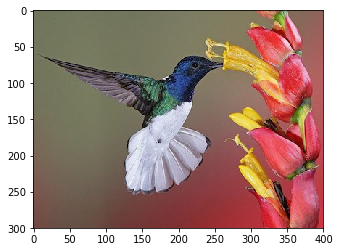

In [152]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("data/bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [153]:
import skimage

img_float = skimage.img_as_float(img)
img_float

array([[[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56470588,  0.38039216,  0.34901961],
        [ 0.56470588,  0.38039216,  0.34901961]],

       ..., 
       [[ 0.45098039,  0.2745098 ,  0.25490196],
        

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [154]:
reshaped = np.vstack(img_float)
print(reshaped)

[[ 0.43529412  0.45882353  0.35686275]
 [ 0.43529412  0.45882353  0.35686275]
 [ 0.43529412  0.45882353  0.35686275]
 ..., 
 [ 0.81176471  0.2         0.25490196]
 [ 0.80392157  0.19607843  0.25882353]
 [ 0.79607843  0.19607843  0.26666667]]


### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [155]:
from sklearn.cluster import KMeans

%time clf = KMeans(n_clusters=8).fit(reshaped)
print(clf)

CPU times: user 11.3 s, sys: 2.86 s, total: 14.1 s
Wall time: 11.1 s
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

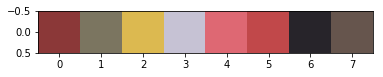

In [156]:
plt.imshow([clf.cluster_centers_])

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

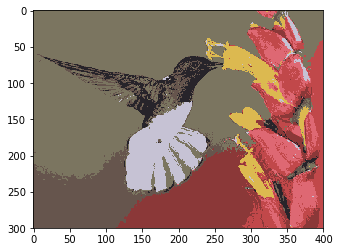

In [157]:
lables_2d = clf.labels_.reshape(300, 400)
centers = clf.cluster_centers_
repainted = np.copy(img_float)

for i in range(0,len(centers)):
    repainted[lables_2d == i] = centers[i]

plt.imshow(repainted)

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [175]:
import pandas as pd

df = pd.read_csv('data/checkins.csv.gz', compression='gzip')
print(len(df))

df.head(5)

100000


,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [163]:
df.describe

<bound method NDFrame.describe of         latitude   longitude
0      38.895112  -77.036366
1      33.800745  -84.410520
2      45.523452 -122.676207
3      40.764462 -111.904565
4      33.448377 -112.074037
5      32.221743 -110.926479
6      40.650000  -73.950000
7      33.448377 -112.074037
8      33.414768 -111.909310
9      42.358431  -71.059773
10     33.448377 -112.074037
11     33.414768 -111.909310
12     33.448377 -112.074037
13     33.248664 -111.634299
14     32.840678 -117.258793
15     34.052234 -118.243685
16     33.414768 -111.909310
17     33.448377 -112.074037
18     34.483901 -114.322455
19     34.048928 -111.093731
20     32.715329 -117.157255
21     33.448377 -112.074037
22     38.895112  -77.036366
23     33.745851 -117.826166
24     34.096111 -118.105833
25     34.052234 -118.243685
26     37.629349 -122.400087
27      4.598056  -74.075833
28     33.804167 -118.158056
29     40.735657  -74.172367
...          ...         ...
99970  32.678109 -117.099197
99971  34

###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [168]:
from sklearn.cluster import MeanShift

%time m_shift_clf = MeanShift(bandwidth=0.1, n_jobs=4).fit(df)
m_shift_clf

CPU times: user 1min 55s, sys: 6.75 s, total: 2min 2s
Wall time: 4min 37s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=4, seeds=None)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

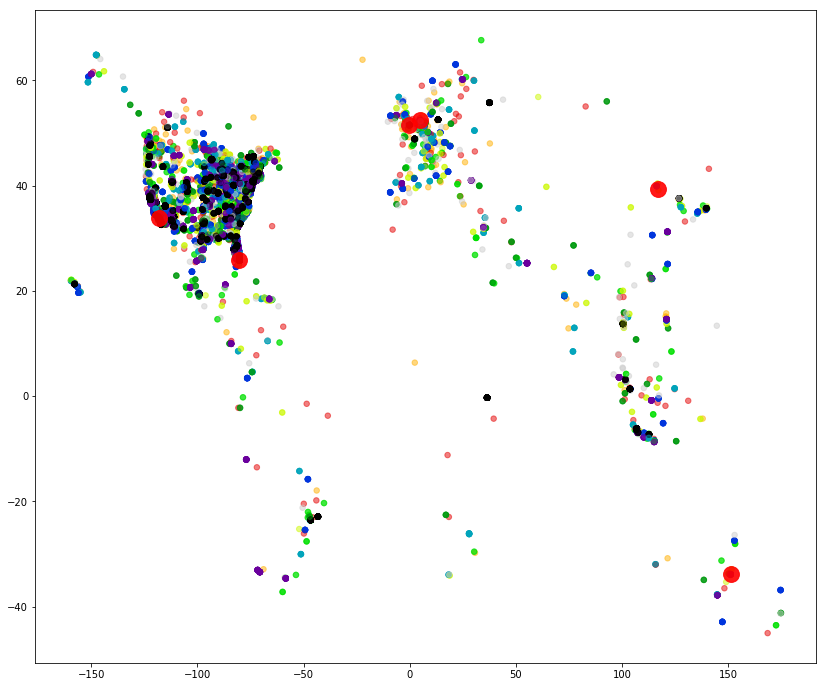

In [186]:
offices = np.array([
    [33.751277, -118.188740], # Los Angeles
    [25.867736, -80.324116],  # Miami
    [51.503016, -0.075479],   # London
    [52.378894, 4.885084],    # Amsterdam
    [39.366487, 117.036146],  # Beijing
    [-33.868457, 151.205134]  # Sydney
])


plt.figure(figsize=(14,12))
plt.scatter(df.longitude, df.latitude, c=m_shift_clf.labels_, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            alpha=0.5, s=30)
plt.scatter(offices[:,1], offices[:,0], c='red', cmap=plt.cm.get_cmap('nipy_spectral', 100),
            alpha=0.8, s=250)

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 